# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merged_df.loc[merged_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"].isin(duplicate_ID),:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.loc[~merged_df["Mouse ID"].isin(duplicate_ID), :]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

cleaned_grouped_df = cleaned_df.groupby(["Drug Regimen"])

summary_avg = cleaned_grouped_df["Tumor Volume (mm3)"].mean()
summary_med = cleaned_grouped_df["Tumor Volume (mm3)"].median()
summary_var = cleaned_grouped_df["Tumor Volume (mm3)"].var()
summary_std = cleaned_grouped_df["Tumor Volume (mm3)"].std()
summary_sem = cleaned_grouped_df["Tumor Volume (mm3)"].sem()

statistics_table = pd.DataFrame({
    "Mean Tumor Volume" : summary_avg,
    "Median Tumor Volume" : summary_med,
    "Tumor Volume Variance" : summary_var,
    "Tumor Volume Std. Dev." : summary_std,
    "Tumor Volume Std. Err." : summary_sem,
})

statistics_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_statistics_table = cleaned_grouped_df[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
new_statistics_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

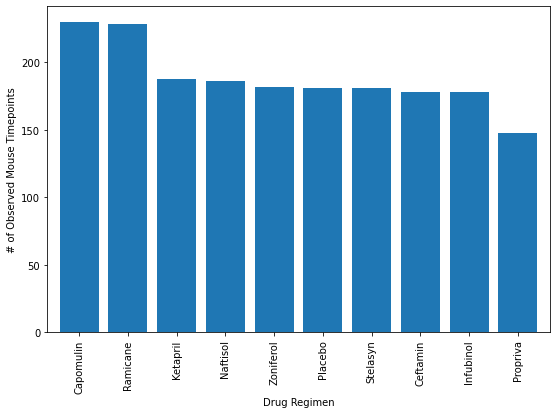

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_by_drug = cleaned_df["Drug Regimen"].value_counts()

# Create bar plot using Pandas
count_by_drug.plot(kind="bar", width=0.8, figsize=(9,6), rot=90)

# Set x-axis label and y-axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Display the plot
plt.show()

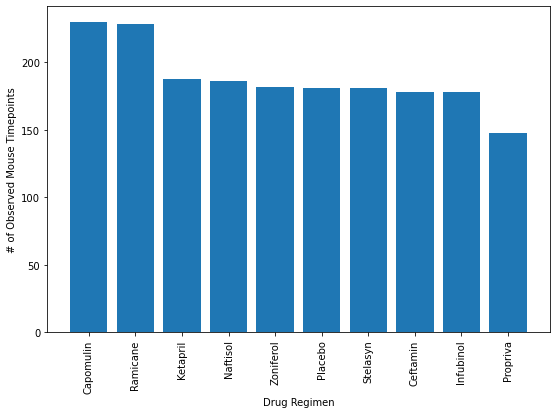

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set the figure size
plt.figure(figsize=(9, 6))

# Create bar plot using Pyplot
plt.bar(count_by_drug.index, count_by_drug)

# Set x-axis label and y-axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

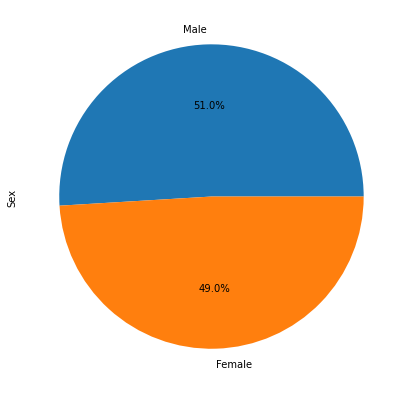

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate counts by gender
count_by_gender = cleaned_df["Sex"].value_counts()

# Create pie plot using Pandas
fig, ax = plt.subplots(figsize=(7,7))
count_by_gender.plot(kind="pie", ax=ax, autopct="%1.1f%%")


# Set the background color of the plot
fig.patch.set_facecolor('white')

# Display the plot
plt.show()


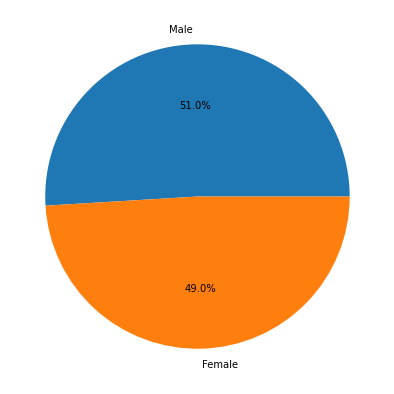

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set the figure size and create a subplot with white background
fig, ax = plt.subplots(figsize=(7,7), facecolor='white')

# Create pie plot using Pyplot
ax.pie(count_by_gender, labels=count_by_gender.index, autopct="%1.1f%%")

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
cleaned_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

filtered_df = cleaned_df[cleaned_df["Drug Regimen"].isin(select_regimen)]


# Start by getting the last (greatest) timepoint for each mouse
grouped_df = filtered_df.groupby("Mouse ID")

last_timepoint_df = grouped_df.agg({"Timepoint": "max"})


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, last_timepoint_df, on=["Mouse ID", "Timepoint"])

result_df = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

result_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,x822,Ceftamin,61.386660
96,y163,Infubinol,67.685569
97,y769,Ceftamin,68.594745
98,y865,Ceftamin,64.729837


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# select_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in select_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Filter the dataframe to include only the current treatment
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == i]
    
    # Get the last (greatest) timepoint for each mouse on the current treatment
    max_timepoints = treatment_df.groupby("Mouse ID")["Timepoint"].max()
    
    # Merge the max timepoints back into the original dataframe to get the corresponding tumor volumes
    max_timepoints_df = pd.merge(max_timepoints, treatment_df, on=["Mouse ID", "Timepoint"], how="left")
    tumor_volumes = max_timepoints_df["Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_list.append(tumor_volumes)
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Identify any potential outliers for the current treatment
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results for the current treatment
    print(f"------------------------------------------------------------")
    print(f"{i}:")
    print(f"   Lower Quartile: {lowerq:.2f}")
    print(f"   Upper Quartile: {upperq:.2f}")
    print(f"   Interquartile Range: {iqr:.2f}")
    print(f"   Median: {quartiles[0.5]:.2f}")
    print(f"   Lower Bound: {lower_bound:.2f}")
    print(f"   Upper Bound: {upper_bound:.2f}")
    print(f"   Number of potential outliers: {len(outliers)}")
    
print(f"------------------------------------------------------------")    


------------------------------------------------------------
Capomulin:
   Lower Quartile: 32.38
   Upper Quartile: 40.16
   Interquartile Range: 7.78
   Median: 38.13
   Lower Bound: 20.70
   Upper Bound: 51.83
   Number of potential outliers: 0
------------------------------------------------------------
Ramicane:
   Lower Quartile: 31.56
   Upper Quartile: 40.66
   Interquartile Range: 9.10
   Median: 36.56
   Lower Bound: 17.91
   Upper Bound: 54.31
   Number of potential outliers: 0
------------------------------------------------------------
Infubinol:
   Lower Quartile: 54.05
   Upper Quartile: 65.53
   Interquartile Range: 11.48
   Median: 60.17
   Lower Bound: 36.83
   Upper Bound: 82.74
   Number of potential outliers: 1
------------------------------------------------------------
Ceftamin:
   Lower Quartile: 48.72
   Upper Quartile: 64.30
   Interquartile Range: 15.58
   Median: 59.85
   Lower Bound: 25.36
   Upper Bound: 87.67
   Number of potential outliers: 0
------------

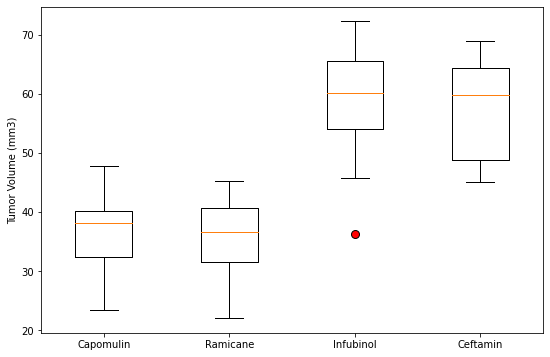

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(9,6))

# Create a boxplot
ax.boxplot(tumor_vol_list,
           flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set label
ax.set_ylabel('Tumor Volume (mm3)')

## Set x-axis tick locations and labels
ax.set_xticklabels(select_regimen)

# Display the plot
plt.show()

## Line and Scatter Plots

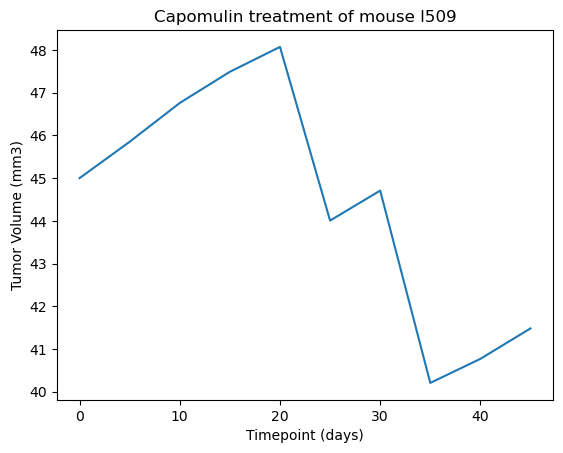

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter merged_data to include only Capomulin treatments
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse ID
mouse_id = 'l509'

# Create a new dataframe for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point for the selected mouse
ax = mouse_data.plot(x='Timepoint',
                     y='Tumor Volume (mm3)',
                     kind='line',
                     figsize=(9,8),
                     fontsize = 12,
                     linewidth=2,
                     markersize=8)

# Set the plot title and axis labels
ax.set_title(f"Capomulin treatment of mouse {mouse_id}", fontsize = 15)
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Remove the legend
ax.legend().remove()

# Show the plot
plt.show()

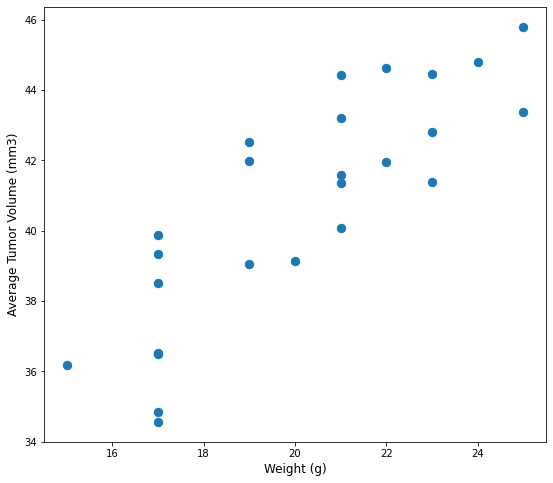

In [90]:
# Calculate the average tumor volume and weight for each mouse on the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_capomulin_data = capomulin_data.groupby(['Mouse ID']).mean()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig, ax = plt.subplots(figsize=(9, 8))

ax.scatter(avg_capomulin_data['Weight (g)'],
           avg_capomulin_data['Tumor Volume (mm3)'],
           marker='o',
           s = 70)

# Set the axis labels
ax.set_xlabel("Weight (g)", fontsize=12)
ax.set_ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Show the plot
plt.show()



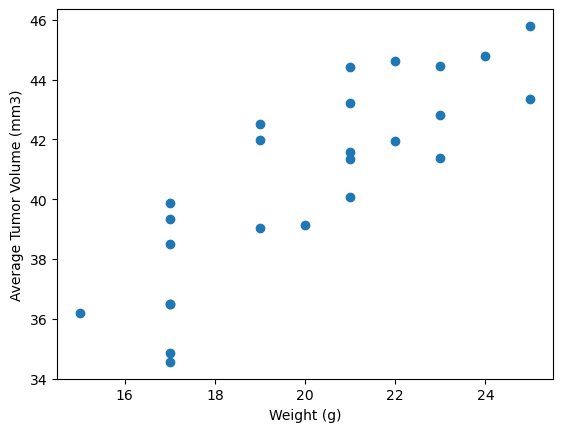

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Average Tumor Volume'])[0]
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Average Tumor Volume'])

# Print the correlation coefficient and slope of the linear regression model
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")




The correlation between mouse weight and the average tumor volume is 0.84


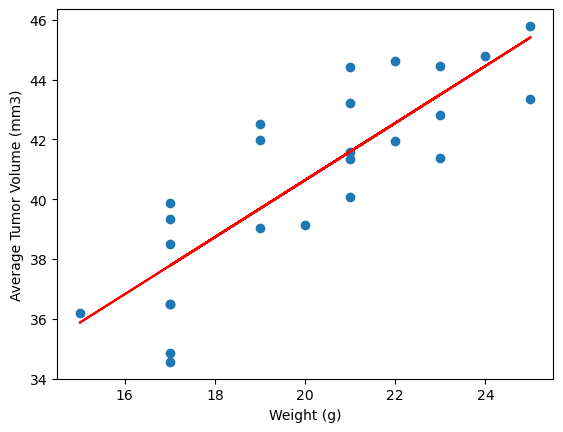

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
